<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-Dataset-Creation---Part-Two" data-toc-modified-id="Image-Dataset-Creation---Part-Two-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image Dataset Creation - Part Two</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Updates" data-toc-modified-id="Updates-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Updates</a></span></li><li><span><a href="#Assumptions" data-toc-modified-id="Assumptions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Assumptions</a></span></li><li><span><a href="#Image-Dataset-Creation-Process" data-toc-modified-id="Image-Dataset-Creation-Process-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Image Dataset Creation Process</a></span><ul class="toc-item"><li><span><a href="#Import-helper-library-and-clean-up" data-toc-modified-id="Import-helper-library-and-clean-up-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Import helper library and clean up</a></span></li><li><span><a href="#Unpack-and-sort-the-raw-images" data-toc-modified-id="Unpack-and-sort-the-raw-images-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Unpack and sort the raw images</a></span></li><li><span><a href="#Standardizing-and-converting-the-images" data-toc-modified-id="Standardizing-and-converting-the-images-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Standardizing and converting the images</a></span></li><li><span><a href="#Creating-randomized-samples" data-toc-modified-id="Creating-randomized-samples-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Creating randomized samples</a></span></li><li><span><a href="#Creating-the-dataset-and-writing-to-disk" data-toc-modified-id="Creating-the-dataset-and-writing-to-disk-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Creating the dataset and writing to disk</a></span></li><li><span><a href="#Simple-dataset-file-validation" data-toc-modified-id="Simple-dataset-file-validation-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Simple dataset file validation</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

<h1 style="text-align: center;">Image Dataset Creation - Part Two</h1>

# Introduction

<img style="float: left; margin-right: 15px;" src="images/catMonocle.jpg">

Now that we've finished with the prototyping in our [last write-up](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/keras/Machine-Learning/Python/02-ComputerVision-Dataset-Creation/ImageDatasetCreation-PartOne.ipynb) we can move forward with finalizing the image dataset creation process.  We'll also attempt to add some level of automation to the process, so we can repeat it a number of times to create multiple datasets with differing parameters.  

Our goal at the end of the write-up is to output a HDF5 archive containing training data and labels, test data and labels, as well as a means to customize the output.  So for example we might want to alter the size of the overall dataset or alter the ratio of train to test items.

So, let's get started!

# Updates

* Since I wrote the [last write-up](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/keras/Machine-Learning/Python/02-ComputerVision-Dataset-Creation/ImageDatasetCreation-PartOne.ipynb) I've discovered it's much easier to utilize the `PIL::Image` module instead of `openCV`.  As such the [ImageDatasetCreationLib_v2](./ImageDatasetCreationLib_v2) library has been updated to reflect this.
* I've also discovered--at least for this type of model--that having the images maintain their aspect ratio when resizing doesn't seem to affect the model all that much.  I've gone ahead and removed the code and narrative for "squaring" the images when resizing them from this document and the [ImageDatasetCreationLib_v2](./ImageDatasetCreationLib_v2) helper library.

# Assumptions

The code in this write-up assumes the following:

* A directory called `sourceData` exists in the same location as this notebook
* Inside the `sourceData` directory are the two archive files containing the raw cat and non-cat images
  * `petImages.tar.gz`
  * `101_ObjectCategories.tar.gz`
  * (Note:  We covered where to find these image source archives in the [last write-up](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/keras/Machine-Learning/Python/02-ComputerVision-Dataset-Creation/ImageDatasetCreation-PartOne.ipynb#Aquire-the-Raw-Dataset-Images) if you wish to obtain them for yourself.)
* The library file `ImageDatasetCreationLib_v2.py` exists in the same location as this notebook

Based on these assumptions our working directory looks like this:

```
PS > tree /F /A
C:.
|   ImageDatasetCreation-PartOne.ipynb
|   ImageDatasetCreation-PartTwo.ipynb
|   ImageDatasetCreationLib_v2.py
|   README.md
|
+---images
|       catMonocle.jpg
|       greenCheckmark.png
|
+---sourceData
|       101_ObjectCategories.tar.gz
|       petImages.tar.gz
|
``` 

# Image Dataset Creation Process

## Import helper library and clean up

First we import the image dataset helper library we created to help process the images and create our dataset:

In [1]:
# autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt.
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import ImageDatasetCreationLib_v2 as ilib
import os

Once the library is loaded you we can examine and configure if needed where the library looks for image files, its output locations, and so forth by altering the values of the `ilib.settings` dictionary:

In [2]:
ilib.settings

{'archiveDirectory': 'sourceData',
 'objectArchiveFile': '101_ObjectCategories.tar.gz',
 'objectExtractDirName': '101_ObjectCategories',
 'objectOutputDirectory': 'objectImages',
 'objectProcessedDirectory': 'objectImagesProcessed',
 'petArchiveFile': 'petImages.tar.gz',
 'petExtractDirName': 'images',
 'petOutputDirectory': 'catImages',
 'petProcessedDirectory': 'catImagesProcessed',
 'resizeDim': 64}

We'll also clean up from any previous image processing tasks:

In [4]:
ilib.clean(ilib.settings)

Cleaning...

Removing C:\cygwin64\home\Nathan\Portfolio\Machine-Learning\Python\02-ComputerVision-Dataset-Creation\sourceData\images
Removing C:\cygwin64\home\Nathan\Portfolio\Machine-Learning\Python\02-ComputerVision-Dataset-Creation\sourceData\101_ObjectCategories
Removing C:\cygwin64\home\Nathan\Portfolio\Machine-Learning\Python\02-ComputerVision-Dataset-Creation\catImages
Removing C:\cygwin64\home\Nathan\Portfolio\Machine-Learning\Python\02-ComputerVision-Dataset-Creation\objectImages
Removing C:\cygwin64\home\Nathan\Portfolio\Machine-Learning\Python\02-ComputerVision-Dataset-Creation\catImagesProcessed
Removing C:\cygwin64\home\Nathan\Portfolio\Machine-Learning\Python\02-ComputerVision-Dataset-Creation\objectImagesProcessed

Done...


## Unpack and sort the raw images

Now we need to unpack the raw images files from the archives we downloaded and move them into the working directories  we'll process from in the next steps.  These output locations are defined in the `ilib.settings` dictionary under the `objectOutputDirectory` and `petOutputDirectory` entries.

Note:  This this next step can take a minute or two...

In [5]:
catCount, objectCount = ilib.unpackImageArchives(ilib.settings)

Unpacking and sorting the pet images...
Unpacking and sorting the object images...

Done!

Total files sorted:10625
Total cats:2400
Total objects:8225




If we examine our file system we now have the following structure:

```
PS > tree /A
C:.
|   ImageDatasetCreation-PartOne.ipynb
|   ImageDatasetCreation-PartTwo.ipynb
|   ImageDatasetCreationLib.py
|   README.md
|
+---catImages
|       Abyssinian_1.jpg
|       Abyssinian_10.jpg
|       Abyssinian_100.jpg
|       Abyssinian_101.jpg
|       Abyssinian_102.jpg
|       Abyssinian_103.jpg
|       Abyssinian_104.jpg
|       Abyssinian_105.jpg
|       .......
+---images
|       catMonocle.jpg
|       greenCheckmark.png
|
+---objectImages
|       accordion-image_0001.jpg
|       accordion-image_0002.jpg
|       accordion-image_0003.jpg
|       accordion-image_0004.jpg
|       accordion-image_0005.jpg
|       .......
+---sourceData
|       101_ObjectCategories.tar.gz
|       petImages.tar.gz
|
```

We can see that the dog images were skipped leaving us with only cats in the `catImages` area, and the object images were moved from their sub-folders and renamed to reflect the object type (i.e. image_0001.jpg --> accordion-image_0001.jpg).

## Standardizing and converting the images

Now that the images are extracted from their source archives and sorted we need to resize them.  This will be taken care of later on when the sample data set is created containing the test and train images and labels.

## Creating randomized samples

OK, we are finally to the good stuff:  Creating the training and test datasets!

Our helper library allows us to call the `createSample` function and specify:
* Number of 'yes' observations (coded as 1)
* Number of 'no' observations (coded as 0)
* Ratio of how the samples should be split between the train and test sets

The `createSample` function will then create a randomized set of images from those we have available that conform to the parameters discussed above.

Let's try it out a few times to view the random sample sets the function returns:

In [3]:
for i in range(0, 3):
    trainImages, testImages, trainLabels, testLabels = ilib.createSample(ilib.settings["petOutputDirectory"],
                                                                ilib.settings["objectOutputDirectory"], 20, 20, 0.2)

    print("-------------------------\n")
    print("- Test Labels:")
    print(testLabels)
    print("- Test Images:")
    print(testImages)
    print("\n")
    
print("Total items in dataset: " + str(len(trainImages) + len(testImages)))
print("Number of train items: " + str(len(trainImages)))
print("Number of test items: " + str(len(testImages)))
print("\n")

-------------------------

- Test Labels:
[array([1, 1, 0, 0, 0, 0, 0, 1])]
- Test Images:
['catImages\\Sphynx_176.jpg' 'catImages\\Russian_Blue_76.jpg'
 'objectImages\\ewer-image_0031.jpg'
 'objectImages\\pyramid-image_0029.jpg'
 'objectImages\\sunflower-image_0070.jpg'
 'objectImages\\sunflower-image_0066.jpg'
 'objectImages\\sunflower-image_0046.jpg'
 'catImages\\Russian_Blue_137.jpg']


-------------------------

- Test Labels:
[array([1, 1, 0, 1, 0, 0, 0, 0])]
- Test Images:
['catImages\\Bombay_156.jpg' 'catImages\\Abyssinian_57.jpg'
 'objectImages\\stegosaurus-image_0019.jpg' 'catImages\\Ragdoll_87.jpg'
 'objectImages\\Faces_easy-image_0157.jpg'
 'objectImages\\schooner-image_0057.jpg'
 'objectImages\\accordion-image_0007.jpg'
 'objectImages\\emu-image_0035.jpg']


-------------------------

- Test Labels:
[array([0, 1, 0, 1, 0, 1, 0, 0])]
- Test Images:
['objectImages\\platypus-image_0023.jpg' 'catImages\\Siamese_169.jpg'
 'objectImages\\sunflower-image_0049.jpg' 'catImages\\Rag

## Creating the dataset and writing to disk

Now that we have a random set of train and test items with labels we can convert the image files to numerical matrices and add them with the labels to the HDF5 archive, and then write it to disk for use in later write-ups.

In [5]:
trainFiles, testFiles, trainLabels, testLabels = ilib.createSample(
    ilib.settings["petOutputDirectory"], ilib.settings["objectOutputDirectory"], 500, 500, 0.2)

trainData = ilib.makeImageData(trainFiles, dim = 64)
testData = ilib.makeImageData(testFiles, dim = 64)

arch = ilib.writeArch("imageData500_64pixels.hdf5", trainData, trainLabels, testData, testLabels)

Creating HDF5 archive file...

Archive created.

imageData500_64pixels.hdf5 written to disk.  File size: 12007.9(kb) / 11.7(mb)




## Simple dataset file validation

And we'll wrap up with a quick validation of the archive:

*** KEYS
HDF5 container keys: ['testData', 'testLabels', 'trainData', 'trainLabels']

*** LABELS
Total number of training labels: 800
Number of cat labels: 396
Number of object labels: 404
First 10 training labels: [0 0 1 1 1 1 1 1 0]


Total number of testing labels: 200
Number of cat labels: 104
Number of object labels: 96
First 10 testing labels: [1 1 0 0 1 1 0 0 0]


*** IMAGE DATA
Image data shape in archive: (800, 64, 64, 3)


First HDF5 container dataSet item shape: (64, 64, 3)
Image data shape after flattening: (192, 64)
First 10 dataSet item matrix values: []


Recreating and showing first 20 images from flattened matrix values:



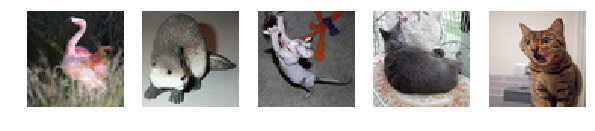

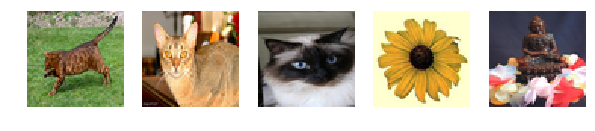

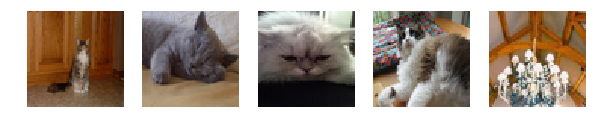

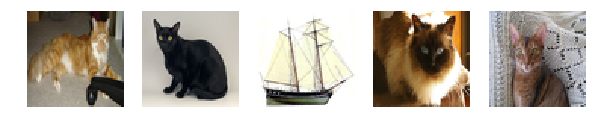

In [6]:
ilib.validateArchive("imageData500_64pixels.hdf5", 20)

# Summary

At this point we have what we need to easily process and create image datasets for our upcoming write-ups.  If we choose to swap out image archives at a later date then with a few modifications to our helper library we should be able to automate processing them as well. 